In [1]:
# Libraries needed for the project

import pandas as pd
import requests
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/jranj/OneDrive/Documents/GitHub/personal01/Food Truck/itemsall.csv")

In [3]:
df

Date      Time                   Time Zone Category  \
0     12/23/2018  12:48:53  Eastern Time (US & Canada)     None   
1     12/22/2018  11:46:37  Eastern Time (US & Canada)     None   
2     12/22/2018  11:36:57  Eastern Time (US & Canada)     None   
3     12/22/2018  11:36:57  Eastern Time (US & Canada)     None   
4     12/22/2018  11:36:57  Eastern Time (US & Canada)     None   
...          ...       ...                         ...      ...   
1447   1/18/2020  17:31:05  Eastern Time (US & Canada)     None   
1448   1/18/2020  16:53:47  Eastern Time (US & Canada)     None   
1449   1/18/2020  16:53:47  Eastern Time (US & Canada)     None   
1450   1/18/2020  16:31:30  Eastern Time (US & Canada)     None   
1451   1/17/2020  11:03:01  Eastern Time (US & Canada)     None   

               Item  Qty Price Point Name  SKU  Modifiers Applied Gross Sales  \
0     Custom Amount    1              NaN  NaN                NaN     $21.00    
1     Custom Amount    1              NaN  NaN                NaN     $17.50    
2      Jerk Chicken    1          Regular  NaN                NaN      $6.50    
3     Custom Amount    1              NaN  NaN                NaN      $5.00    
4     Custom Amount    1              NaN  NaN                NaN      $3.00    
...             ...  ...              ...  ...                ...         ...   
1447  Custom Amount    1              NaN  NaN                NaN     $12.00    
1448  Custom Amount    1              NaN  NaN                NaN     $20.00    
1449  Custom Amount    1              NaN  NaN                NaN      $2.00    
1450  Custom Amount    1              NaN  NaN                NaN     $12.00    
1451  Custom Amount    1              NaN  NaN                NaN      $1.00    

      ... Device Name                                              Notes  \
0     ...         NaN                                                NaN   
1     ...         NaN                                                NaN   
2     ...         NaN  Juicy Grilled Leg Quarters steamed down in the...   
3     ...         NaN                                                NaN   
4     ...         NaN                                                NaN   
...   ...         ...                                                ...   
1447  ...         NaN                                                NaN   
1448  ...         NaN                                                NaN   
1449  ...         NaN                                                NaN   
1450  ...         NaN                                                NaN   
1451  ...         NaN                                                NaN   

     Event Type          Location Dining Option                 Customer ID  \
0       Payment  Authentic by Zee           NaN  ET95G97MHS02PYQGZCJWEYVM8W   
1       Payment  Authentic by Zee           NaN  9FY2KQCGFX3E7A6SR5D0YPWCSM   
2       Payment  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   
3       Payment  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   
4       Payment  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   
...         ...               ...           ...                         ...   
1447    Payment  Authentic by Zee           NaN  PRM3K7R095615917Q1YEACJV58   
1448    Payment  Authentic by Zee           NaN  46S6T7DQN14VF5YB9PHVATZVX8   
1449    Payment  Authentic by Zee           NaN  46S6T7DQN14VF5YB9PHVATZVX8   
1450    Payment  Authentic by Zee           NaN  C8QDZB6PHS08KENWEDWEAWXPCC   
1451    Payment  Authentic by Zee           NaN  RXE6RJDF1H5W16B5AQHPRCYC2W   

                              Customer Name Customer Reference ID Unit  Count  
0                           Raymond Ferreri                   NaN   ea      1  
1                        Michael Fricchione                   NaN   ea      1  
2                           William Wharton                   NaN   ea      1  
3                           William Wharton         

In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
df["Gross Sales"] = df["Gross Sales"].str.replace(r'[^0-9\.]','',regex=True)
df["Gross Sales"] = pd.to_numeric(df["Gross Sales"])

In [6]:
df["day_of_week"] = df.Date.dt.day_name()

In [7]:
df["month"] = df.Date.dt.month_name()

In [8]:
df["month_index"] = df.Date.dt.month

<AxesSubplot:>

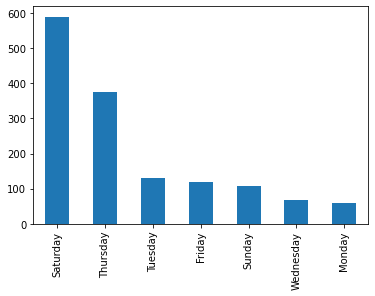

In [9]:
pd.value_counts(df.day_of_week,dropna=False).plot(kind='bar')

C:\Users\jranj\.conda\envs\py3.8\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='day_of_week'>

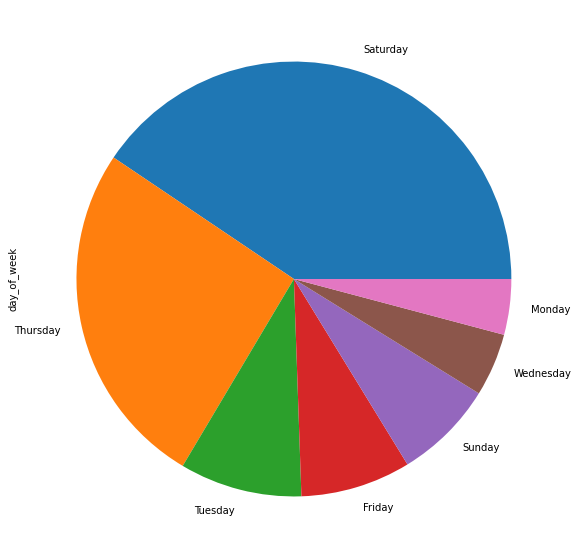

In [10]:
pd.value_counts(df.day_of_week,normalize=True,dropna=False).plot(kind='pie',figsize=(10,10))

In [11]:
sales_data = df.groupby(['month',"month_index"]).agg({"Gross Sales":sum,"Qty":sum}).reset_index().sort_values(by='month_index')

<AxesSubplot:xlabel='month', ylabel='Gross Sales'>

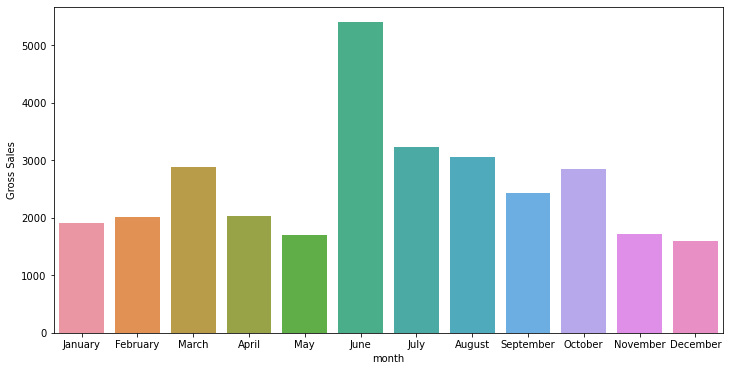

In [12]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Gross Sales",data=sales_data,ax=ax)

<AxesSubplot:xlabel='month', ylabel='Qty'>

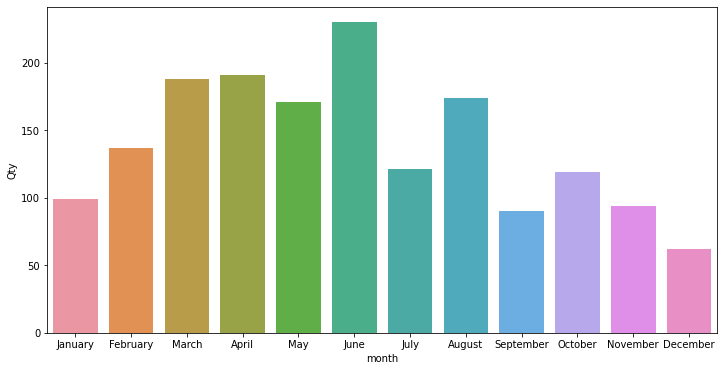

In [13]:
fig_size = (12,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.barplot(x='month',y="Qty",data=sales_data,ax=ax)

In [14]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Event Type', 'Location', 'Dining Option',
       'Customer ID', 'Customer Name', 'Customer Reference ID', 'Unit',
       'Count', 'day_of_week', 'month', 'month_index'],
      dtype='object')

In [15]:
day_vs_item = df.groupby(["day_of_week"])["Item"].apply(list).reset_index()

In [16]:
df.Item.value_counts()[df.Item.value_counts() > 25].index.tolist()

['Custom Amount',
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail']

In [17]:
subset = df[df.Item.isin([
 'Jerk Chicken',
 'Chicken Fajitas',
 'BBQ Chicken',
 'Curry chicken',
 'Short Ribs',
 'Wings',
 'Oxtail'])]

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

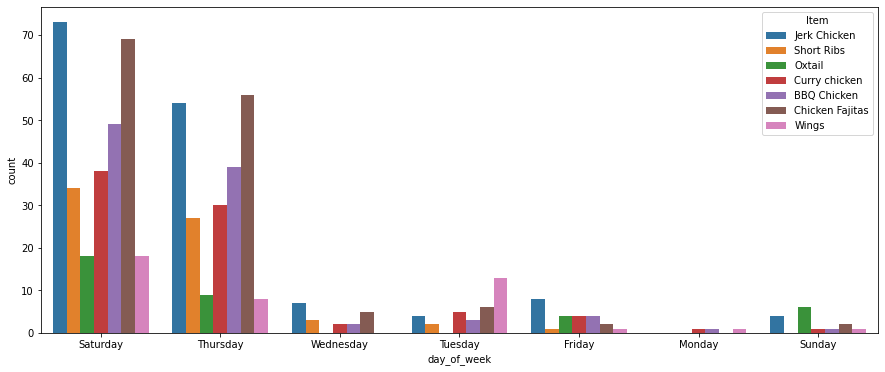

In [18]:
fig_size = (15,6)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="day_of_week",hue="Item",data=subset,ax=ax)

<AxesSubplot:xlabel='month', ylabel='count'>

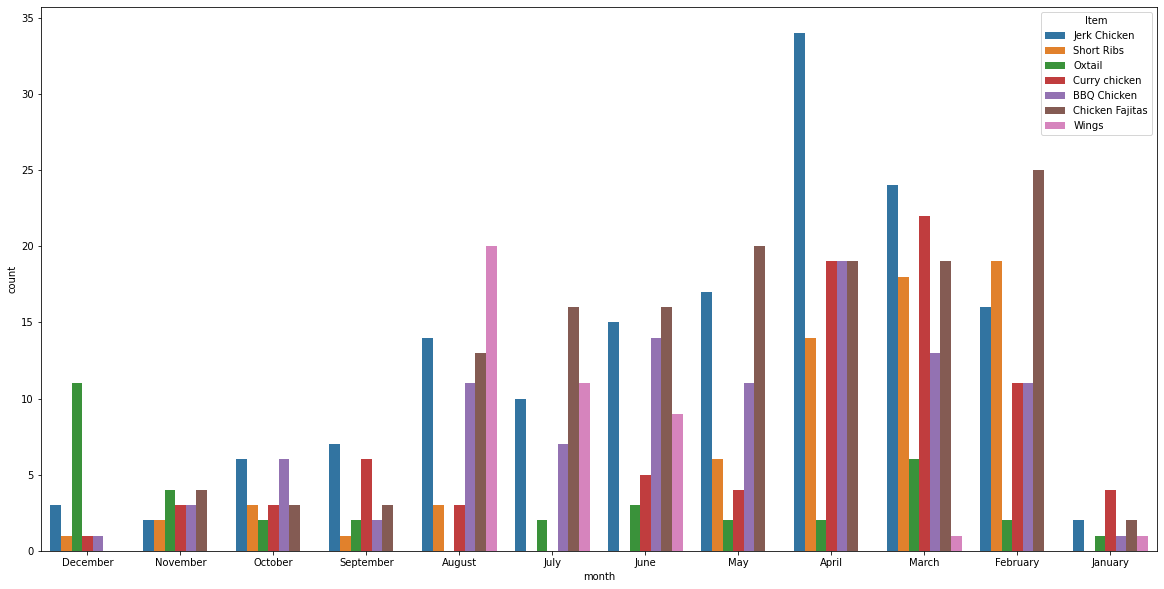

In [19]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.countplot(x="month",hue="Item",data=subset,ax=ax)

[Text(0, 0.5, 'Relative Frequency'), Text(0.5, 0, 'Month')]

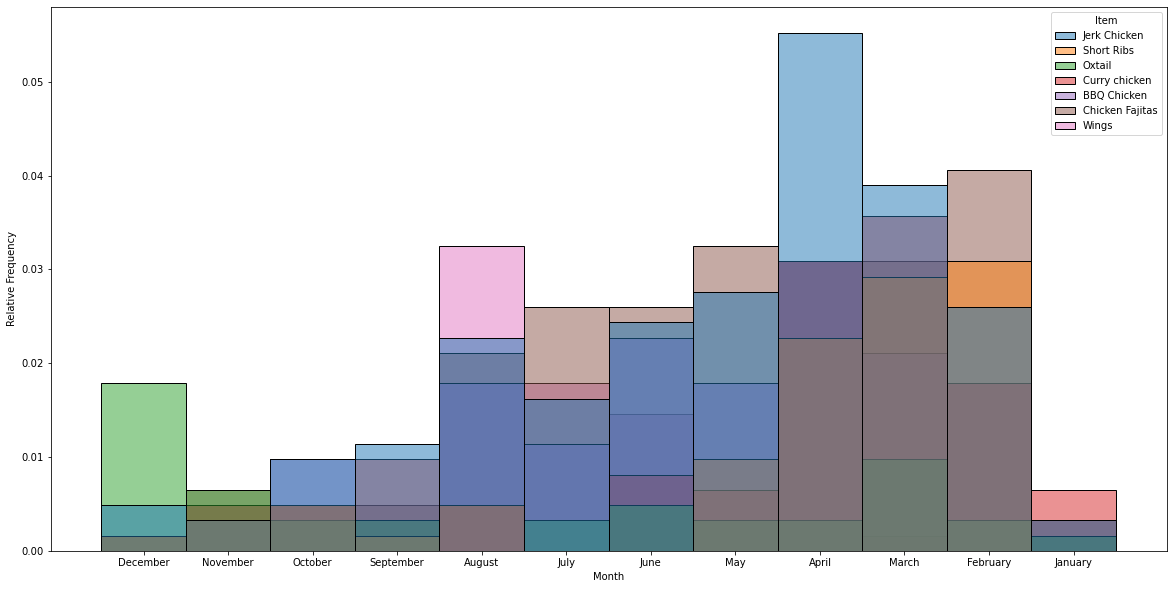

In [20]:
fig_size = (20,10)
fig,ax = plt.subplots(figsize=fig_size)
sns.color_palette("Set1")
plot = sns.histplot(x="month",hue="Item",data=subset,ax=ax,stat="probability",)
plot.set(ylabel="Relative Frequency",xlabel="Month")

In [21]:
subset.to_excel("./ss.xlsx")

In [22]:
df.columns

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Event Type', 'Location', 'Dining Option',
       'Customer ID', 'Customer Name', 'Customer Reference ID', 'Unit',
       'Count', 'day_of_week', 'month', 'month_index'],
      dtype='object')

In [23]:
a_Rules = df.groupby("Transaction ID")["Item"].apply(list).reset_index()

In [24]:
a_Rules["n_items"] = a_Rules.Item.apply(len)

In [25]:
a_Rules["Item"] = a_Rules.Item.apply(lambda x:",".join(x))

In [26]:
a_Rules.tail()

Transaction ID                        Item  n_items
1091  ztmAvnVu8ddFYSNUA3rnEWheV  Jerk Chicken,Curry chicken        2
1092  zvVPd2EXe5t0KmHKY09aXv7eV                Jerk Chicken        1
1093  zvpdNThkyaLHdYrNRA9rIi7eV               Curry chicken        1
1094  zxAYDeNWowtAxoJPUBzG4LpeV               Custom Amount        1
1095  zxenBX8VyDGtV8ZkoXd2XC9eV  Custom Amount,Jerk Chicken        2

In [27]:
a_Rules.to_csv("./assoc_rule.csv",index=False)

In [28]:
df.head()

Date      Time                   Time Zone Category           Item  \
0 2018-12-23  12:48:53  Eastern Time (US & Canada)     None  Custom Amount   
1 2018-12-22  11:46:37  Eastern Time (US & Canada)     None  Custom Amount   
2 2018-12-22  11:36:57  Eastern Time (US & Canada)     None   Jerk Chicken   
3 2018-12-22  11:36:57  Eastern Time (US & Canada)     None  Custom Amount   
4 2018-12-22  11:36:57  Eastern Time (US & Canada)     None  Custom Amount   

   Qty Price Point Name  SKU  Modifiers Applied  Gross Sales  ...  \
0    1              NaN  NaN                NaN         21.0  ...   
1    1              NaN  NaN                NaN         17.5  ...   
2    1          Regular  NaN                NaN          6.5  ...   
3    1              NaN  NaN                NaN          5.0  ...   
4    1              NaN  NaN                NaN          3.0  ...   

           Location Dining Option                 Customer ID  \
0  Authentic by Zee           NaN  ET95G97MHS02PYQGZCJWEYVM8W   
1  Authentic by Zee           NaN  9FY2KQCGFX3E7A6SR5D0YPWCSM   
2  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   
3  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   
4  Authentic by Zee           NaN  J4X9N1NKMN3CCZA27TV71PP1GM   

        Customer Name Customer Reference ID Unit Count day_of_week     month  \
0     Raymond Ferreri                   NaN   ea     1      Sunday  December   
1  Michael Fricchione                   NaN   ea     1    Saturday  December   
2     William Wharton                   NaN   ea     1    Saturday  December   
3     William Wharton                   NaN   ea     1    Saturday  December   
4     William Wharton                   NaN   ea     1    Saturday  December   

   month_index  
0           12  
1           12  
2           12  
3           12  
4           12  

[5 rows x 28 columns]

In [29]:
df.Date = df.Date.dt.date

In [30]:
ts = df[["Date","Net Sales"]].copy()

In [31]:
ts.columns = ["ds","y"]

In [32]:
ts.y = ts.y.str.replace(r'[^0-9\.]','',regex=True)

In [33]:
ts.y = pd.to_numeric(ts.y)
ts  = ts.groupby(["ds"])["y"].sum().reset_index()

In [34]:
m = Prophet()

In [35]:
m.fit(ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=365)

In [37]:
forecast = m.predict(future)

In [38]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
613 2021-12-27  193.880701 -101.273687  331.407422   193.880681   193.880719   
614 2021-12-28  193.967781  -74.081232  353.291926   193.967762   193.967799   
615 2021-12-29  194.054861    4.908034  439.469541   194.054842   194.054879   
616 2021-12-30  194.141941  -32.881371  379.490458   194.141922   194.141959   
617 2021-12-31  194.229021  -56.604318  407.121070   194.229002   194.229039   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
613      -68.729360            -68.729360            -68.729360 -61.106894   
614      -46.985769            -46.985769            -46.985769 -35.174014   
615       43.197521             43.197521             43.197521  59.265844   
616      -22.180768            -22.180768            -22.180768  -1.872715   
617       -8.892747             -8.892747             -8.892747  15.555790   

     weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
613    -61.106894    -61.106894  -7.622466     -7.622466     -7.622466   
614    -35.174014    -35.174014 -11.811755    -11.811755    -11.811755   
615     59.265844     59.265844 -16.068322    -16.068322    -16.068322   
616     -1.872715     -1.872715 -20.308054    -20.308054    -20.308054   
617     15.555790     15.555790 -24.448537    -24.448537    -24.448537   

     multiplicative_terms  multiplicative_terms_lower  \
613                   0.0                         0.0   
614                   0.0                         0.0   
615                   0.0                         0.0   
616                   0.0                         0.0   
617                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
613                         0.0  125.151341  
614                         0.0  146.982012  
615                         0.0  237.252382  
616                         0.0  171.961173  
617                         0.0  185.336274

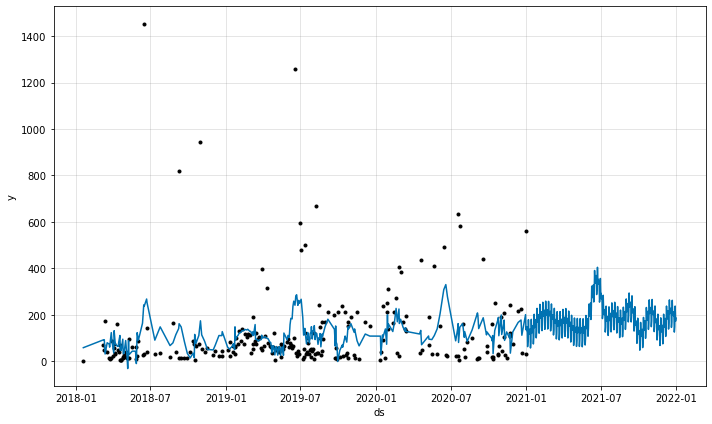

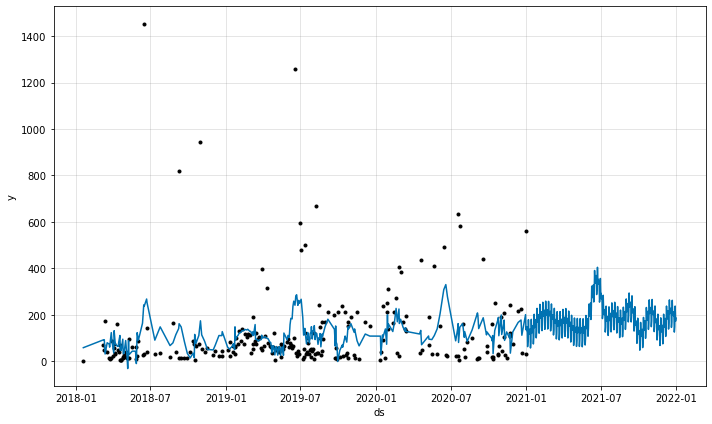

In [39]:
m.plot(forecast,uncertainty=False)

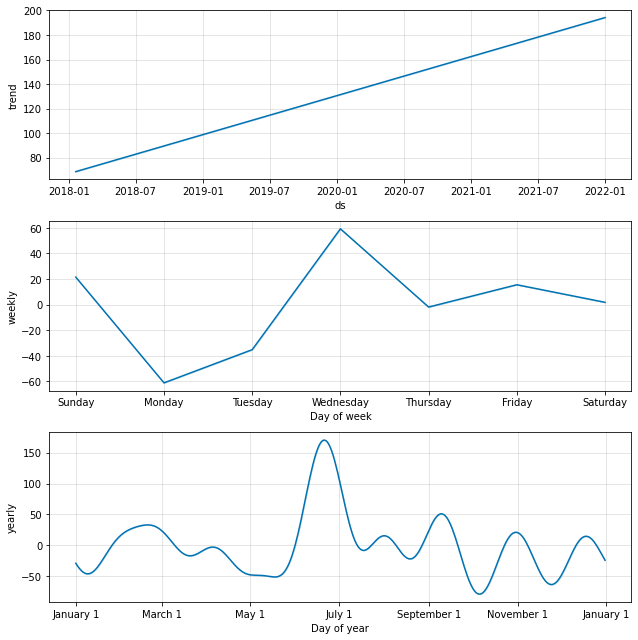

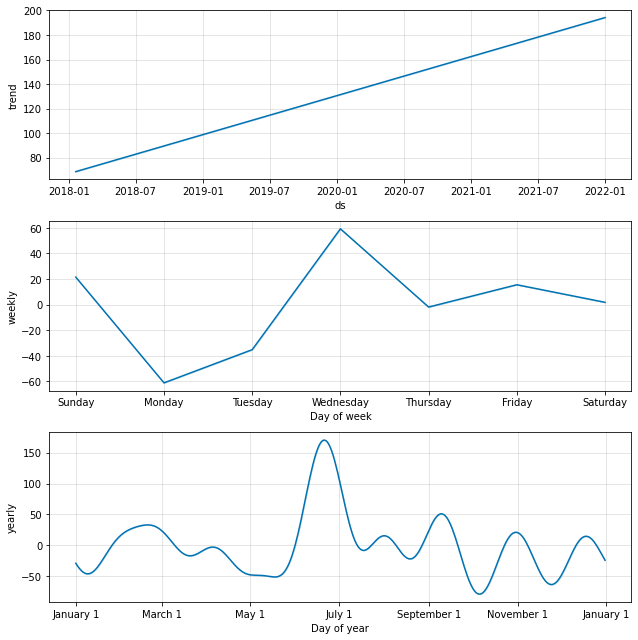

In [40]:
m.plot_components(forecast)

In [41]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='182 days', period='30 days', horizon = '365 days')

INFO:prophet:Making 18 forecasts with cutoffs between 2018-08-09 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

In [42]:
df_cv

ds          yhat    yhat_lower    yhat_upper       y     cutoff
0    2018-08-18 -38847.495444 -39070.518790 -38640.439925   19.00 2018-08-09
1    2018-08-25 -23827.710574 -24038.716064 -23628.578513  165.50 2018-08-09
2    2018-09-01   3683.769134   3471.448929   3887.091130   40.50 2018-08-09
3    2018-09-08  23855.167781  23628.224273  24051.704231   14.00 2018-08-09
4    2018-09-09  24859.699405  24646.549566  25069.859775  820.00 2018-08-09
...         ...           ...           ...           ...     ...        ...
1697 2020-12-12    164.440866    -39.827137    370.947216  218.00 2020-01-01
1698 2020-12-19    147.135870    -56.040823    369.966618  224.00 2020-01-01
1699 2020-12-21    208.213077     -9.475181    422.134517   35.00 2020-01-01
1700 2020-12-30    146.429206    -61.666214    351.557411  560.62 2020-01-01
1701 2020-12-31     80.349922   -139.281188    301.145048   31.00 2020-01-01

[1702 rows x 6 columns]

In [43]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon           mse         rmse          mae       mape     mdape  \
0    35 days  2.776275e+07  5269.036860  1552.779075  44.631375  1.342640   
1    36 days  3.092682e+07  5561.188754  1694.953195  55.575437  1.342640   
2    37 days  3.092368e+07  5560.906334  1694.978620  55.418601  1.329748   
3    38 days  3.346710e+07  5785.075544  1849.832306  60.629901  1.342640   
4    39 days  3.401550e+07  5832.281269  1918.715727  69.060046  1.422160   
..       ...           ...          ...          ...        ...       ...   
326 361 days  6.514449e+06  2552.341917   909.447399  33.375653  3.642085   
327 362 days  1.007571e+07  3174.225552  1047.604787  38.044126  3.678120   
328 363 days  1.005789e+07  3171.418095  1042.514864  37.861637  3.642085   
329 364 days  1.536028e+07  3919.218798  1215.974615  37.686899  3.281668   
330 365 days  1.534552e+07  3917.335488  1207.426917  37.209963  2.926048   

        smape  coverage  
0    1.291319  0.623529  
1    1.299349  0.614118  
2    1.303539  0.614706  
3    1.331939  0.598824  
4    1.348762  0.596078  
..        ...       ...  
326  1.453453  0.480000  
327  1.455555  0.475294  
328  1.446336  0.476471  
329  1.453675  0.469412  
330  1.439326  0.479412  

[331 rows x 8 columns]